In [16]:
# basic
import numpy as np
import pandas as pd
from IPython.display import display
import sys
import os
sys.path.append('../../utils')

In [17]:
# visualization
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.io import imread, imshow

In [18]:
# utils libs
from process import *

In [19]:
## Creating an object
%time ip = ImagePrec(path = '../../data/train',size=200, channel=3, normalize=True, augment=True)


## Generating training batch for the training process
%time train = ip.get_batch_data(expand=4, seed=17)
%time print train['x'].shape
%time print train['y'].shape

Extracting training image info ...
Time Usage: 56.8878319263 sec
5360 5360 5360
CPU times: user 50.9 s, sys: 5.73 s, total: 56.6 s
Wall time: 56.9 s
Getting cropped images ...
Time Usage: 0.15024805069 sec
CPU times: user 5.95 s, sys: 6.5 s, total: 12.5 s
Wall time: 12.5 s
(21440, 200, 200, 3)
CPU times: user 318 µs, sys: 163 µs, total: 481 µs
Wall time: 375 µs
(21440, 200, 200)
CPU times: user 189 µs, sys: 102 µs, total: 291 µs
Wall time: 223 µs


In [20]:
idx = np.array([np.random.randint(len(train['x'])) for i in range(9)])
print idx

[ 4681 10665 14289 17339 11906 17149 19877 14802  9273]


In [21]:
imgs = train['x'][idx]
masks = train['y'][idx]

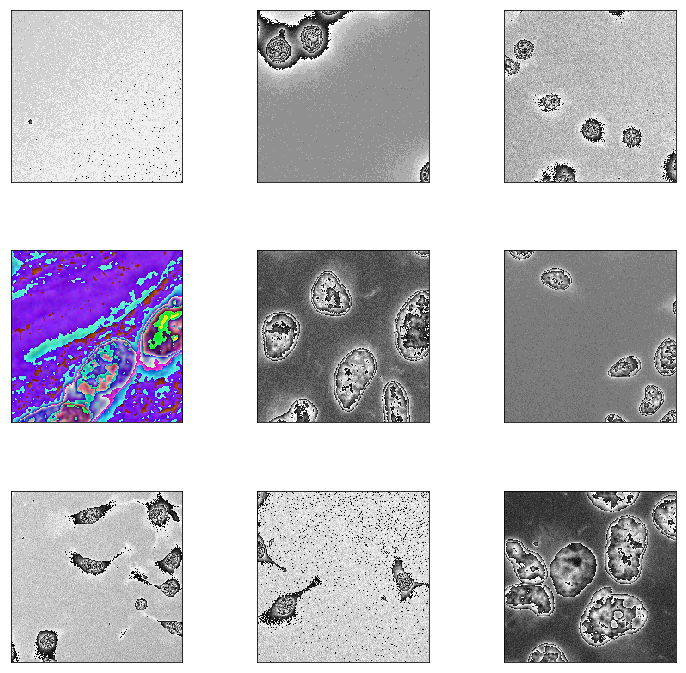

In [22]:
fig, axes = plt.subplots(3, 3, figsize = (12, 12))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i, ax in enumerate(axes.flat):
    ax.imshow(imgs[i])
    ax.set_xticks([])
    ax.set_yticks([])

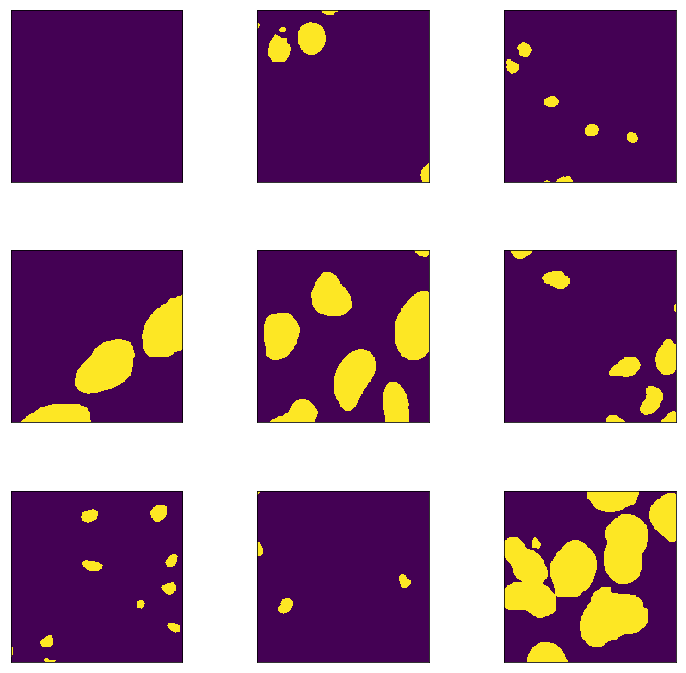

In [23]:
fig, axes = plt.subplots(3, 3, figsize = (12, 12))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i, ax in enumerate(axes.flat):
    ax.imshow(masks[i])
    ax.set_xticks([])
    ax.set_yticks([])

In [24]:
print len(ip._imgs)
idx = np.array([np.random.randint(len(ip._imgs)) for i in range(9)])
imgs = [ip._imgs[i] for i in idx]
masks = [ip._masks[i] for i in idx]

5360


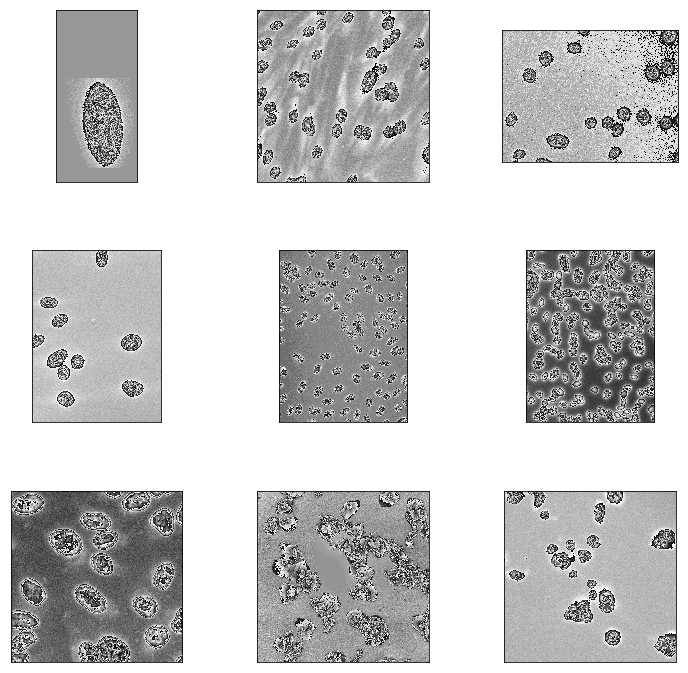

In [25]:
fig, axes = plt.subplots(3, 3, figsize = (12, 12))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i, ax in enumerate(axes.flat):
    ax.imshow(imgs[i])
    ax.set_xticks([])
    ax.set_yticks([])

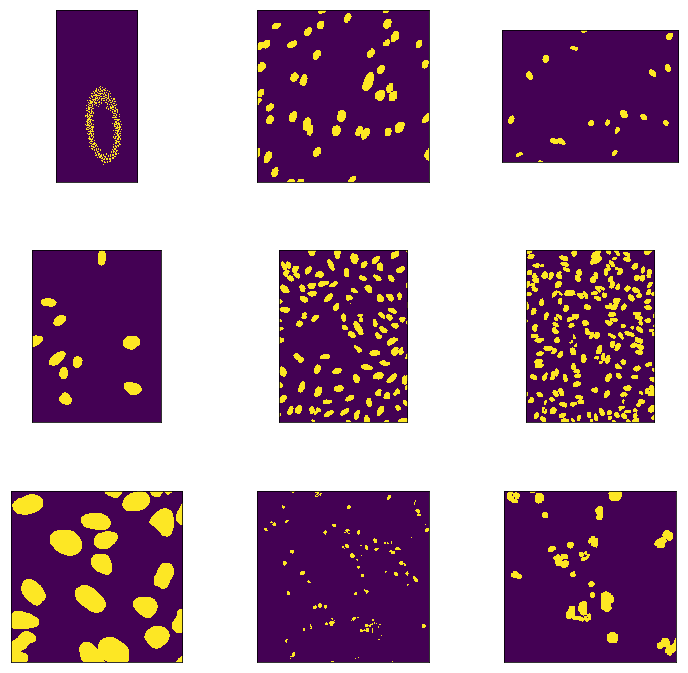

In [26]:
fig, axes = plt.subplots(3, 3, figsize = (12, 12))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i, ax in enumerate(axes.flat):
    ax.imshow(masks[i])
    ax.set_xticks([])
    ax.set_yticks([])

In [31]:
# Keras
from keras import backend as K
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.layers import Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Input, Reshape
from keras.optimizers import SGD, Adam, RMSprop, Adadelta
from keras.utils import np_utils, plot_model
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.callbacks import LearningRateScheduler
from keras import regularizers
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50

In [32]:
model_resnet = ResNet50(weights='imagenet', include_top=False)
model_resnet.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, None, None, 3) 0                                            
____________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D) (None, None, None, 3) 0                                            
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, None, None, 64 9472                                         
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, None, None, 64 256                                          
___________________________________________________________________________________________

activation_89 (Activation)       (None, None, None, 10 0                                            
____________________________________________________________________________________________________
res5a_branch2a (Conv2D)          (None, None, None, 51 524800                                       
____________________________________________________________________________________________________
bn5a_branch2a (BatchNormalizatio (None, None, None, 51 2048                                         
____________________________________________________________________________________________________
activation_90 (Activation)       (None, None, None, 51 0                                            
____________________________________________________________________________________________________
res5a_branch2b (Conv2D)          (None, None, None, 51 2359808                                      
___________________________________________________________________________________________

In [34]:
model = Sequential()
model.add(Conv2D(32, input_shape = (200, 200, 3), kernel_size = (7, 7), padding = 'same'))
model.add(Dropout(0.1))
model.add(Conv2D(64, kernel_size = (5, 5), padding = 'same'))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size = (3, 3), padding = 'same'))
model.add(Dropout(0.75))
model.add(Conv2D(1, kernel_size = (3, 3), padding = 'same'))
model.add(Dropout(0.5))
model.add(Reshape((200, 200)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 200, 200, 32)      4736      
_________________________________________________________________
dropout_5 (Dropout)          (None, 200, 200, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 200, 200, 64)      51264     
_________________________________________________________________
dropout_6 (Dropout)          (None, 200, 200, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 200, 200, 128)     73856     
_________________________________________________________________
dropout_7 (Dropout)          (None, 200, 200, 128)     0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 200, 200, 1)       1153      
__________

In [36]:
learning_rate = 0.01
optimizer = SGD(learning_rate)
loss = 'binary_crossentropy'
metrics = ['accuracy']
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [37]:
for _ in range(50):
    %time train = ip.get_batch_data(expand=4, seed=17)
    model.fit(train['x'], train['y'], batch_size=128, epochs=2, verbose=1)

Getting cropped images ...
Time Usage: 0.171252012253 sec
CPU times: user 6.06 s, sys: 3.58 s, total: 9.64 s
Wall time: 9.51 s
Epoch 1/2


ResourceExhaustedError: OOM when allocating tensor with shape[128,64,200,200]
	 [[Node: conv2d_6/convolution = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/gpu:0"](dropout_5/cond/Merge, conv2d_6/kernel/read)]]
	 [[Node: Mean_5/_2591 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_874_Mean_5", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op u'conv2d_6/convolution', defined at:
  File "/opt/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/opt/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/opt/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/opt/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/opt/anaconda2/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/opt/anaconda2/lib/python2.7/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/opt/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/opt/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/opt/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/opt/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/opt/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/opt/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/opt/anaconda2/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/opt/anaconda2/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/opt/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/opt/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/opt/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-a443b760bfda>", line 4, in <module>
    model.add(Conv2D(64, kernel_size = (5, 5), padding = 'same'))
  File "/opt/anaconda2/lib/python2.7/site-packages/keras/models.py", line 455, in add
    output_tensor = layer(self.outputs[0])
  File "/opt/anaconda2/lib/python2.7/site-packages/keras/engine/topology.py", line 554, in __call__
    output = self.call(inputs, **kwargs)
  File "/opt/anaconda2/lib/python2.7/site-packages/keras/layers/convolutional.py", line 164, in call
    dilation_rate=self.dilation_rate)
  File "/opt/anaconda2/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py", line 2862, in conv2d
    data_format='NHWC')
  File "/opt/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/nn_ops.py", line 672, in convolution
    op=op)
  File "/opt/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/nn_ops.py", line 338, in with_space_to_batch
    return op(input, num_spatial_dims, padding)
  File "/opt/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/nn_ops.py", line 664, in op
    name=name)
  File "/opt/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/nn_ops.py", line 131, in _non_atrous_convolution
    name=name)
  File "/opt/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 397, in conv2d
    data_format=data_format, name=name)
  File "/opt/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/opt/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/opt/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[128,64,200,200]
	 [[Node: conv2d_6/convolution = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/gpu:0"](dropout_5/cond/Merge, conv2d_6/kernel/read)]]
	 [[Node: Mean_5/_2591 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_874_Mean_5", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]
